# Load the data

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

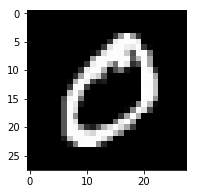

In [3]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 6, 1)
ax.imshow(x_train[1], cmap='gray')

In [4]:
# rescale the data 

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [5]:
# create vecto with 1 and 0 for y lables 

y_train_encode = np_utils.to_categorical(y_train, 10)
y_test_encode = np_utils.to_categorical(y_test, 10)

In [6]:
y_train_encode[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [7]:
# this dataset has 60000 records and each reacord is a 2d array of 28x28
x_train_scaled.shape

(60000, 28, 28)

Neural Network is using relu actication function except in the last layer. 

### relu activation function 
relu activation function has following properties
- All the negative values will map to 0 (since the image has the min value = 0, this is a good idea)
- does not change the positive values (values range in a gray scale from 0 to 255, this is a good idea)
- This also help to avoid the vanishing gradiant problem 


![title](relu.jpeg)



In [8]:
# create a CNN 

model = Sequential()

model.add(Flatten(input_shape=x_train_scaled.shape[1:]))

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

In [9]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

# Evalucate the model before training 

This model has some random weights in the begining and give some treible results.


In [10]:
score = model.evaluate(x_test_scaled, y_test_encode, verbose=0)

In [11]:
score[1]*100 # Accuracy

8.3599999999999994

# Train the Model

In [12]:
from keras.callbacks import ModelCheckpoint

In [13]:
checkpointer = ModelCheckpoint(
    filepath="mnist.model.best.prabath.hdf5", 
    verbose=1,
    save_best_only=True
)

In [14]:
hist = model.fit(
    x_train_scaled, 
    y_train_encode, 
    batch_size=128, 
    epochs=10, 
    validation_split=0.2, 
    callbacks=[checkpointer], 
    verbose=1
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s - loss: 0.2745 - acc: 0.9151 - val_loss: 0.1215 - val_acc: 0.9622
Epoch 2/10
48000/48000 [==============================] - 13s - loss: 0.1136 - acc: 0.9653 - val_loss: 0.0949 - val_acc: 0.9722
Epoch 3/10
48000/48000 [==============================] - 13s - loss: 0.0790 - acc: 0.9761 - val_loss: 0.0877 - val_acc: 0.9752
Epoch 4/10
48000/48000 [==============================] - 13s - loss: 0.0622 - acc: 0.9809 - val_loss: 0.0865 - val_acc: 0.9778
Epoch 5/10
48000/48000 [==============================] - 13s - loss: 0.0489 - acc: 0.9849 - val_loss: 0.0938 - val_acc: 0.9771
Epoch 6/10
48000/48000 [==============================] - 13s - loss: 0.0450 - acc: 0.9864 - val_loss: 0.0984 - val_acc: 0.9788
Epoch 7/10
48000/48000 [==============================] - 13s - loss: 0.0373 - acc: 0.9891 - val_loss: 0.1021 - val_acc: 0.9768
Epoch 8/10
48000/48000 [==============================

In [15]:
model.load_weights("mnist.model.best.prabath.hdf5")

In [20]:
score = model.evaluate(x_test_scaled, y_test_encode, verbose=1)

 9728/10000 [============================>.] - ETA: 0s

In [22]:
score

[0.078833036235836332, 0.97899999999999998]